In [1]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data
import os
import requests
import env
import iexfinance as iex

In [ ]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

In [ ]:
sp = pd.read_csv('S&P500-Symbols.csv', index_col=[0])

In [ ]:
sp.info()

In [ ]:
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token=env.token)
    company_info = stock_batch.get_company()
    return company_info

In [ ]:
start = datetime(2017,12,31)
end = datetime(2021,1,29)

In [ ]:
def getHistoricalPrices(stock):
    return get_historical_data(stock, start, end, 
                               output_format='pandas', 
                               token=env.token)

In [ ]:
#nio = getHistoricalPrices('NIO')

In [ ]:
nio.T

In [ ]:
round(nio.volume.mean(),0)

In [ ]:
for col in nio.columns:
    plt.hist(nio[col])
    plt.title(col)
    plt.show()

In [ ]:
nio.close.plot()

In [ ]:
nio.volume.plot()

In [ ]:
plt.figure(figsize = (14, 7))
plt.plot(nio.index, nio['close'])
plt.title("NIO Close")
plt.show()

In [2]:
# Importing pyEx to use the sandbox environment and save tokens
import pyEX as p

In [12]:
p.chart?

In [6]:
p.chart('xom', token= env.sand_token, version='pandas', timeframe='1m')

PyEXception: ('Response 404 - ', 'Not Found')

In [43]:
p.Client?

In [7]:
c = p.Client(version='sandbox', api_token = env.sand_token)

In [26]:
nio = c.chartDF('NIO')

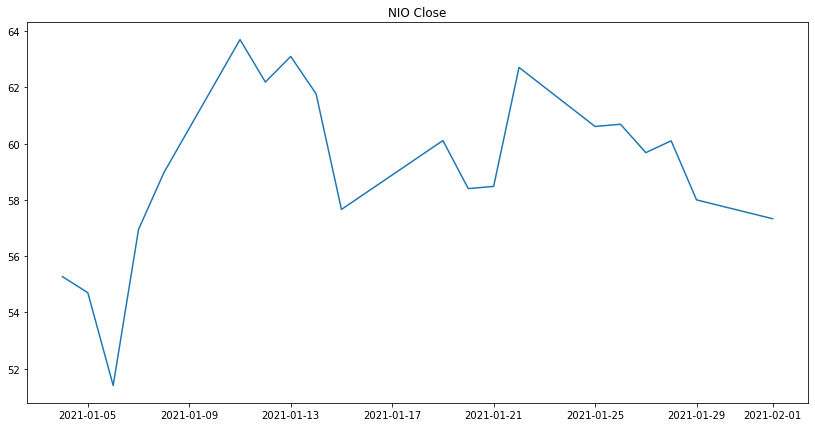

In [30]:
plt.figure(figsize = (14, 7))
plt.plot(nio.index, nio['close'])
plt.title("NIO Close")
plt.show()

In [31]:
xom = c.chartDF('xom')

In [32]:
xom

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01,45.42,45.650,44.7700,47.61,XOM,25040272,CHSRLICIRPEOS_AIT,XOM,0,2022-06-14 01:38:46.372,...,44.5300,25049881,46.45,44.94,46.160,44.4200,25319008,"Feb 1, 21",0.000000,0.0000
2021-01-29,46.67,46.590,46.1400,47.02,XOM,40531439,IICSRAO_PHITRSCEL,OXM,0,2023-07-08 01:01:33.653,...,45.8700,39862442,45.79,47.05,47.060,46.6400,39226165,"Jan 29, 21",-0.081940,-0.0019
2021-01-28,47.51,48.180,47.1200,48.07,XOM,25004289,TLRERPCCISISIHA_O,XOM,0,2021-10-22 08:42:42.652,...,46.8900,25194737,47.87,47.51,48.590,47.0600,25101510,"Jan 28, 21",1.233755,0.0277
2021-01-27,46.71,47.690,45.2600,45.00,XOM,34023524,STR_OCHCLRSIPIIAE,XMO,0,2022-05-18 06:16:39.265,...,45.3600,33449843,46.00,47.12,47.220,46.1500,32838822,"Jan 27, 21",-0.741100,-0.0154
2021-01-26,47.44,48.540,46.0300,49.47,XOM,24198912,CSR_HCPLEIAOISRIT,MXO,0,2023-04-23 14:15:52.753,...,45.9300,24521053,48.68,46.97,48.430,47.2300,24798241,"Jan 26, 21",0.521387,0.0120
2021-01-25,47.10,47.640,47.9500,47.20,XOM,26482482,RPAER_OLISHITCSIC,XMO,0,2021-11-11 06:18:33.117,...,46.3800,27152338,49.20,48.60,47.930,47.8200,27150179,"Jan 25, 21",1.035073,0.0225
2021-01-22,49.39,49.300,48.2600,48.00,XOM,24125526,ELOSPIRISC_TIRACH,XMO,0,2022-12-12 03:44:00.665,...,47.5800,23884039,47.57,47.45,49.850,47.5300,23459421,"Jan 22, 21",0.539606,0.0119
2021-01-21,50.09,49.850,48.1500,50.38,XOM,30067146,ITERRSLCHOIIPSAC_,OXM,0,2021-11-14 02:36:24.553,...,49.2900,30099503,50.73,49.21,49.990,47.9800,29441483,"Jan 21, 21",0.686606,0.0148
2021-01-20,49.90,52.050,50.2815,50.98,XOM,22977280,L_IHOPAECRSTRIICS,XOM,0,2022-07-07 13:09:28.817,...,50.5604,23006857,50.71,51.34,51.740,50.3154,22442302,"Jan 20, 21",1.432283,0.0302


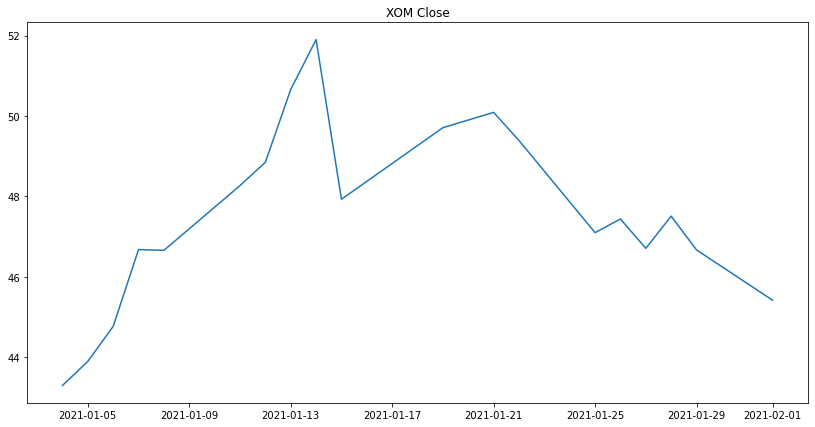

In [33]:
plt.figure(figsize = (14, 7))
plt.plot(xom.index, xom['close'])
plt.title("XOM Close")
plt.show()

In [34]:
c.ceoCompensation('xom')

{'symbol': 'XOM',
 'name': 'oWn oDsderar',
 'companyName': 'Exxon Mobil Corporation',
 'location': ',Xi IrgvTn',
 'salary': 1413117,
 'bonus': 2570782,
 'stockAwards': 12030381,
 'optionAwards': 0,
 'nonEquityIncentives': 0,
 'pensionAndDeferred': 3082035,
 'otherComp': 288459,
 'total': 19531885,
 'year': '2048'}

In [42]:
c.bollinger('xom')

AttributeError: 'Client' object has no attribute 'bollinger'

In [40]:
c.peerCorrelation("xom")

AttributeError: 'Client' object has no attribute 'peerCorrelation'

In [44]:
rule = {
        'conditions': [['changePercent','>',500],
                       ['latestPrice','>',100000]],
        'outputs': [{'frequency': 60,
                     'method': 'email',
                     'to': 'your_email@domain'
                    }]
        }